In [ ]:
# Confidence interval of probability prediction from logistic regression statsmodels
# https://stackoverflow.com/questions/47414842/confidence-interval-of-probability-prediction-from-logistic-regression-statsmode

Optimization terminated successfully.
         Current function value: 0.262382
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jan 2018   Pseudo R-squ.:                  0.6175
Time:                        04:01:04   Log-Likelihood:                -26.238
converged:                       True   LL-Null:                       -68.593
                                        LLR p-value:                 3.456e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8760      1.427     -4.819      0.000      -9.673      -4.079
x1             0.1238      0.

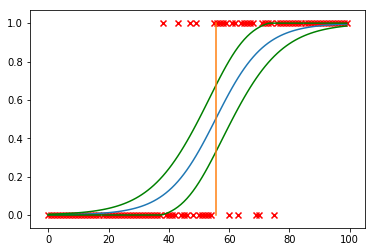

In [85]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# generate data
np.random.seed(1)
x = np.arange(100)

# x * 0.5（つまり0〜99） + 平均0、分散10の乱数が30より大きいか否か...つまり、
# xが60のときにyがtrue/falseのどちらかになるかは半々になる値を作成する
y = (x * 0.5 + np.random.normal(size=100, scale=10) > 30)

# estimate the model
# [0, 1, 2, 3, ...] というnbarrayを [[1,0], [1, 1], [1, 2], [1,3], ...] というnbarrayに変換している
# statsmodels.formula.apiを使うのであれば必要ない
# https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api
X = sm.add_constant(x)

model = sm.Logit(y, X).fit()

print(model.summary())
# => 
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         -6.8760      1.427     -4.819      0.000      -9.673      -4.079
# x1             0.1238      0.025      4.958      0.000       0.075       0.173
# p = 0.1238 * x - 6.876 とすると、p = 0となるのは
# x = 55.541
print(model.predict([1, 55.541])) # => [ 0.50043543] 0.5になった、OK

# 入力Xに対する分類確率を計算しているだけ
proba = model.predict(X) # predicted probability

# estimate confidence interval for predicted probabilities
cov = model.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x, proba)
plt.plot(x, lower, color='g')
plt.plot(x, upper, color='g')
plt.scatter(x, y, c='red', marker='x')

# 線形分離の線も描く
const = model.params[0]
x1 = model.params[1]
v = -const / x1
plt.plot([v,v],[0,1])

# conf_int = model.conf_int()
# const = conf_int[0][0]
# x1 = conf_int[1][0]
# v = -const / x1
# plt.plot([v, v], [0, 1], "g")

plt.show()